In [73]:
import numpy as np
import matplotlib.pyplot as plt 
import pylab
from scipy import stats
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [82]:
# create data 
num_data_pts_per_cluster = 50

# blur or variance around each centroid 

blur = 1

# XY centroid locations  

A = [1,1]
B = [-3, 1]
C = [3, 3]

# data generated on centroid, numper of data pts, and variance. 

a = [ A[0] + np.random.randn(num_data_pts_per_cluster) * blur, A[1] + np.random.randn(num_data_pts_per_cluster) * blur]
b = [ B[0] + np.random.randn(num_data_pts_per_cluster) * blur, B[1] + np.random.randn(num_data_pts_per_cluster) * blur]
c = [ C[0] + np.random.randn(num_data_pts_per_cluster) * blur, C[1] + np.random.randn(num_data_pts_per_cluster) * blur]

# concatenate into list 
data = np.transpose(np.concatenate((a,b,c), axis = 1))
print(data[0:10]) # a subset of the data 

[[ 2.08242422  2.06017857]
 [ 1.41897746 -0.7850836 ]
 [ 2.1867688   1.66858129]
 [ 1.30435516  0.24658064]
 [ 1.37726885  0.84999791]
 [ 0.95029382  1.06299987]
 [ 0.05647772  0.04141847]
 [ 2.4316259   1.32094486]
 [ 1.56815705  1.64198003]
 [ 0.28269224  1.44891805]]


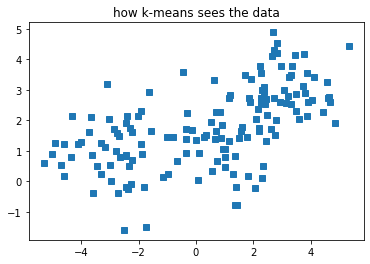

In [83]:
#plot the data
plt.plot(data[:, 0], data[:, 1], 's')
plt.title('how k-means sees the data')
plt.show()

In [84]:
# k-means clustering 

k = 3 # how many clusters 
kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(data)

#group labels, for each data point, which tells if it's in group 1 or 2
group_labels_for_data = kmeans.predict(data)
print(group_labels_for_data)

#centroids 
centroids = kmeans.cluster_centers_
print(centroids)




[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 2 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
[[ 0.80790705  1.22994484]
 [ 3.14425563  3.01268254]
 [-2.98732071  0.967738  ]]


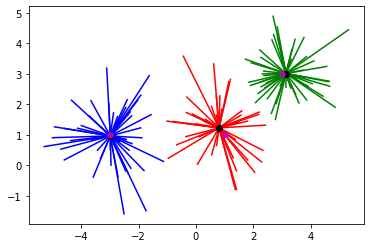

In [85]:
# plot 

# draw lines from each data point to the centroids of each cluster 
lineColors = 'rgbmrkbgm'
for i in range(0, len(data)):
    plt.plot([ data[i,0], centroids[group_labels_for_data[i], 0]], [data[i, 1], centroids[group_labels_for_data[i], 1]], lineColors[group_labels_for_data[i]])
    

#ax = plt.gca()
#ax.set_xlim([xmin, xmax])
#ax.set_ylim([-2.0, 5.0])    
# plot the centroid locations 
plt.plot(centroids[:, 0], centroids[:, 1], 'ko')

# plot the "ground-truth" centers 

plt.plot(A[0], A[1], 'mp')
plt.plot(B[0], B[1], 'mp')
plt.plot(C[0], C[1], 'mp')

C:\Users\Joel\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


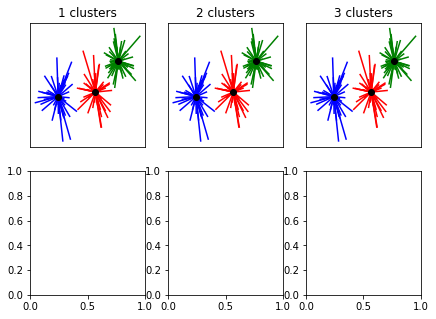

In [90]:
## determining the appropriate number of clusters (qualitative)

fig,ax = plt.subplots(2,3,figsize=(7,5))
ax = ax.flatten()

for k in range(6):
    
    kmeans = KMeans(n_clusters=k+1).fit(data)
    groupidx = kmeans.predict(data)
    cents = kmeans.cluster_centers_
    
    # draw lines from each data point to the centroids of each cluster
    for i in range(0,len(data)):
        ax[k].plot([ data[i,0],centroids[group_labels_for_data[i],0] ],[ data[i,1],centroids[group_labels_for_data[i],1] ],lineColors[group_labels_for_data[i]])
    
    # and now plot the centroid locations
    ax[k].plot(centroids[:,0],centroids[:,1],'ko')
    ax[k].set_xticks([])
    ax[k].set_yticks([])
    ax[k].set_title('%g clusters'%(k+1))

In [ ]:
## number of clusters (quantative)

from sklearn.metrics import silhouette_samples, silhouette_score

ssds = np.zeros(7)
sils = np.zeros(7)/0

for k in range(7):
    kmeans = KMeans(n_clusters=k+1).fit(data)
    ssds[k] = np.mean(kmeans.inertia_)
    
    if k>0:
        s = silhouette_samples(data,kmeans.predict(data))
        sils[k] = np.mean( s )

plt.plot(np.arange(1,8),ssds,'k^-',markerfacecolor='k')
plt.title('The elbow test')
plt.show()

plt.plot(np.arange(1,8),sils,'k^-',markerfacecolor='k')
plt.title('The silhouette test')
plt.xlabel('Number of clusters')
plt.show()

In [ ]:
## Try again in 3D

nPerClust = 50

# blur around centroid (std units)
n = 1

# XY centroid locations
A = [  1, 2,  0 ]
B = [ -2, 1, -2 ]
C = [  3, 3,  2 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*n , A[1]+np.random.randn(nPerClust)*n , A[2]+np.random.randn(nPerClust)*n ]
b = [ B[0]+np.random.randn(nPerClust)*n , B[1]+np.random.randn(nPerClust)*n , B[2]+np.random.randn(nPerClust)*n ]
c = [ C[0]+np.random.randn(nPerClust)*n , C[1]+np.random.randn(nPerClust)*n , C[2]+np.random.randn(nPerClust)*n ]

# concatanate into a list
data = np.transpose( np.concatenate((a,b,c),axis=1) )

# show the data
ax = Axes3D(plt.figure())
ax.scatter(data[:,0],data[:,1],data[:,2], c = 'b', marker='o')
plt.title('How k-means sees the data')
plt.show()

In [ ]:
k = 3 # how many clusters?
kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(data)
# group labels
groupidx = kmeans.predict(data)
# centroids
cents = kmeans.cluster_centers_

# draw lines from each data point to the centroids of each cluster
lineColors = 'rgbgmrkbgm';
ax = Axes3D(plt.figure())
for i in range(0,len(data)):
    ax.plot([ data[i,0],cents[groupidx[i],0] ],[ data[i,1],cents[groupidx[i],1] ],[ data[i,2],cents[groupidx[i],2] ],lineColors[groupidx[i]])

# and now plot the centroid locations
ax.plot(cents[:,0],cents[:,1],cents[:,2],'ko')

plt.show()